In [48]:
from pycaret.regression import *

In [2]:
import pandas as pd
import numpy as np

In [49]:
data_ori = pd.read_csv('telomere_696.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alp          696 non-null    int64  
 1   ast          696 non-null    int64  
 2   alt          696 non-null    int64  
 3   ggt          696 non-null    int64  
 4   tp           696 non-null    float64
 5   alb          696 non-null    float64
 6   dbil         696 non-null    float64
 7   tbil         696 non-null    float64
 8   bun          696 non-null    int64  
 9   cr           696 non-null    float64
 10  tg           696 non-null    int64  
 11  chol         696 non-null    int64  
 12  hdl          696 non-null    int64  
 13  ldl          696 non-null    int64  
 14  hba1c        696 non-null    float64
 15  glob         696 non-null    float64
 16  hb           696 non-null    float64
 17  hct          696 non-null    float64
 18  glu          696 non-null    int64  
 19  wbc     

In [50]:
regression = setup(data = data_ori,target = 'telomere', normalize=True,feature_selection =True)

,Description,Value
0,Session id,8270
1,Target,telomere
2,Target type,Regression
3,Data shape,"(696, 11)"
4,Train data shape,"(487, 11)"
5,Test data shape,"(209, 11)"
6,Numeric features,33
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [51]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.3469,0.2161,0.4578,0.1042,0.2133,0.4490,0.0250
br,Bayesian Ridge,0.3413,0.2158,0.4569,0.1026,0.2127,0.4415,0.0250
ridge,Ridge Regression,0.3418,0.2159,0.4574,0.0952,0.2132,0.4400,0.0270
lr,Linear Regression,0.3419,0.2159,0.4575,0.0949,0.2132,0.4400,1.2600
lar,Least Angle Regression,0.3419,0.2159,0.4575,0.0949,0.2132,0.4400,0.0260
huber,Huber Regressor,0.3386,0.2183,0.4597,0.0935,0.2119,0.4173,0.0260
lasso,Lasso Regression,0.3731,0.2519,0.4916,-0.0153,0.2292,0.4948,0.0260
dummy,Dummy Regressor,0.3731,0.2519,0.4916,-0.0153,0.2292,0.4948,0.0230
llar,Lasso Least Angle Regression,0.3731,0.2519,0.4916,-0.0153,0.2292,0.4948,0.0250
en,Elastic Net,0.3731,0.2519,0.4916,-0.0153,0.2292,0.4948,0.0240


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize='deprecated', precompute='auto', tol=None)

In [52]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3824,0.2303,0.4799,0.2247,0.2331,0.5928
1,0.2710,0.1501,0.3874,0.2137,0.1843,0.3287
2,0.3379,0.1747,0.4180,-0.0219,0.2131,0.5005
3,0.3913,0.2516,0.5016,0.2167,0.2269,0.4463
4,0.2992,0.1413,0.3759,0.1324,0.1884,0.3939
5,0.4290,0.4247,0.6517,0.1061,0.2648,0.5660
6,0.3203,0.1798,0.4241,-0.0984,0.2068,0.3956
7,0.3726,0.2830,0.5320,0.2277,0.2245,0.4280
8,0.3098,0.1668,0.4084,-0.3101,0.2012,0.3641


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3867,0.3116,0.5582,0.1999,0.2482,0.5992
1,0.3502,0.1856,0.4309,0.1453,0.2101,0.4642
2,0.3238,0.1860,0.4313,0.1040,0.2076,0.4159
3,0.3729,0.2196,0.4686,-0.0648,0.2351,0.5704
4,0.2949,0.1505,0.3879,0.0781,0.1797,0.3020
5,0.3361,0.2101,0.4584,0.2343,0.2029,0.3825
6,0.3925,0.2644,0.5142,-0.0969,0.2325,0.4505
7,0.2769,0.1196,0.3459,-0.2918,0.1807,0.3737
8,0.3247,0.1623,0.4029,0.3192,0.1968,0.4061


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LinearRegression(n_jobs=-1)

In [12]:
from pycaret.classification import *

In [13]:
data_random = pd.read_csv('original_cutOut_bin4.csv')

In [14]:
ori = setup(data = data_random, target = 'ycut' )

,Description,Value
0,Session id,291
1,Target,ycut
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(655, 34)"
5,Transformed data shape,"(655, 34)"
6,Transformed train set shape,"(458, 34)"
7,Transformed test set shape,"(197, 34)"
8,Numeric features,33
9,Preprocess,True


In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4106,0.5653,0.4106,0.3206,0.3360,0.0713,0.0849,0.0890
gbc,Gradient Boosting Classifier,0.3996,0.5805,0.3996,0.3931,0.3771,0.1062,0.1102,0.2970
dummy,Dummy Classifier,0.3996,0.5000,0.3996,0.1597,0.2282,0.0000,0.0000,0.0180
et,Extra Trees Classifier,0.3886,0.5420,0.3886,0.3240,0.3274,0.0438,0.0492,0.0800
lr,Logistic Regression,0.3669,0.5406,0.3669,0.3481,0.3329,0.0372,0.0401,0.9330
ada,Ada Boost Classifier,0.3668,0.5179,0.3668,0.3506,0.3494,0.0727,0.0745,0.0550
ridge,Ridge Classifier,0.3622,0.0000,0.3622,0.3310,0.3264,0.0264,0.0275,0.0150
lightgbm,Light Gradient Boosting Machine,0.3603,0.5349,0.3603,0.3180,0.3251,0.0390,0.0438,0.2300
svm,SVM - Linear Kernel,0.3537,0.0000,0.3537,0.2334,0.2494,0.0346,0.0500,0.0190
lda,Linear Discriminant Analysis,0.3492,0.5627,0.3492,0.3195,0.3222,0.0232,0.0228,0.0230


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [16]:
rf_ori = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4348,0.5868,0.4348,0.2848,0.3159,0.0721,0.1021
1,0.5217,0.6158,0.5217,0.4987,0.4668,0.2385,0.2788
2,0.4130,0.5739,0.4130,0.2839,0.3311,0.0591,0.0691
3,0.3043,0.5264,0.3043,0.2302,0.2518,-0.0667,-0.0738
4,0.4130,0.5182,0.4130,0.2715,0.3204,0.0731,0.0865
5,0.3696,0.6047,0.3696,0.2459,0.2904,0.0074,0.0086
6,0.4348,0.6177,0.4348,0.3891,0.3725,0.1219,0.1349
7,0.3261,0.4072,0.3261,0.2229,0.2543,-0.0516,-0.0617
8,0.4444,0.5711,0.4444,0.3579,0.3835,0.1445,0.1569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
tune_model(rf_ori)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4348,0.5428,0.4348,0.3197,0.2868,0.0463,0.1134
1,0.4130,0.5908,0.4130,0.4402,0.3410,0.0497,0.0621
2,0.3913,0.6307,0.3913,0.2800,0.2984,-0.0031,-0.0044
3,0.4348,0.5299,0.4348,0.3045,0.3335,0.0967,0.1282
4,0.3913,0.6204,0.3913,0.2580,0.2768,0.0183,0.0283
5,0.4130,0.6182,0.4130,0.2831,0.3276,0.0731,0.0865
6,0.4565,0.5994,0.4565,0.3337,0.3676,0.1366,0.1699
7,0.3696,0.4315,0.3696,0.2484,0.2899,0.0169,0.0200
8,0.4444,0.5228,0.4444,0.3938,0.3714,0.1211,0.1463


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_samples_leaf=4,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=291, verbose=0, warm_start=False)

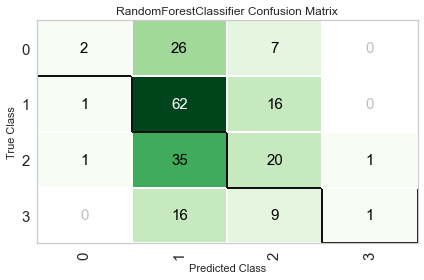

In [18]:
plot_model(rf_ori,plot ='confusion_matrix')

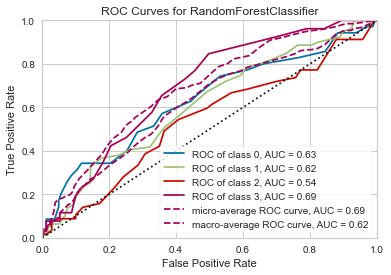

In [19]:
plot_model(rf_ori, plot = 'auc')

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=2)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [21]:
data = pd.read_csv('original_cutOut_bin4.csv')
dt = data.copy()

In [22]:
a =['alp', 'ast', 'alt', 'ggt', 'tp', 'alb', 'dbil', 'tbil', 'bun', 'cr',
       'tg', 'chol', 'hdl', 'ldl', 'hba1c', 'glob', 'hb', 'hct', 'glu', 'wbc',
       'rbc', 'neutrophils', 'lymphocytes', 'monocytes', 'eosinophils',
       'basophils', 'mcv', 'mch', 'mchc', 'rdw', 'dem_ageyear',
       'pe_bmi']
name = ['alp_c', 'ast_c', 'alt_c', 'ggt_c', 'tp_c', 'alb_c', 'dbil_c', 'tbil_c', 'bun_c', 'cr_c',
       'tg_c', 'chol_c', 'hdl_c', 'ldl_c', 'hba1c_c', 'glob_c', 'hb_c', 'hct_c', 'glu_c', 'wbc_c',
       'rbc_c', 'neutrophils_c', 'lymphocytes_c', 'monocytes_c', 'eosinophils_c',
       'basophils_c', 'mcv_c', 'mch_c', 'mchc_c', 'rdw_c', 'dem_ageyear_c',
       'pe_bmi_c']

In [23]:
for i in range(len(a)):
    tree_model.fit(data.iloc[:,i:i+1],data.ycut)
    data[a[i]] = tree_model.predict_proba(data.iloc[:,i:i+1])[:,1]
    data = pd.get_dummies(data, columns=[a[i]] )
    #data[a[i]] = labelencoder.fit_transform(data[a[i]])
    #data = pd.get_dummies(data, columns=[a[i]], prefix=["Type_is"] )

In [24]:
aa = data

In [25]:
aa

,dem_sex,ycut,alp_0.08333333333333333,alp_0.3900709219858156,alp_0.39344262295081966,alp_0.46987951807228917,ast_0.07692307692307693,ast_0.29310344827586204,ast_0.3806818181818182,ast_0.4338235294117647,...,mch_0.0,mch_0.402457757296467,mchc_0.3389830508474576,mchc_0.40604026845637586,rdw_0.08333333333333333,rdw_0.4059097978227061,dem_ageyear_0.3125,dem_ageyear_0.40947546531302875,pe_bmi_0.0,pe_bmi_0.404320987654321
0,2,4,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
1,2,4,0,0,0,1,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
2,2,4,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3,1,4,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,1
4,1,4,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1,1,0,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
651,2,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
652,1,1,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
653,2,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1


In [26]:
random_data = setup(data = aa, target = 'ycut' )

,Description,Value
0,Session id,5164
1,Target,ycut
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(655, 99)"
5,Transformed data shape,"(655, 98)"
6,Transformed train set shape,"(458, 98)"
7,Transformed test set shape,"(197, 98)"
8,Numeric features,98
9,Preprocess,True


In [27]:
best_mining = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5110,0.6859,0.5110,0.4879,0.4841,0.2751,0.2832,1.1940
lda,Linear Discriminant Analysis,0.5023,0.6834,0.5023,0.4960,0.4830,0.2665,0.2717,0.0260
ridge,Ridge Classifier,0.4957,0.0000,0.4957,0.4679,0.4633,0.2454,0.2532,0.0180
gbc,Gradient Boosting Classifier,0.4891,0.6612,0.4891,0.4865,0.4662,0.2454,0.2554,0.1870
svm,SVM - Linear Kernel,0.4563,0.0000,0.4563,0.5034,0.4058,0.1991,0.2250,0.0230
rf,Random Forest Classifier,0.4457,0.6193,0.4457,0.4149,0.4110,0.1686,0.1746,0.0900
ada,Ada Boost Classifier,0.4410,0.6161,0.4410,0.4225,0.4254,0.1881,0.1915,0.0550
et,Extra Trees Classifier,0.4194,0.6216,0.4194,0.4017,0.3954,0.1439,0.1478,0.0810
lightgbm,Light Gradient Boosting Machine,0.4152,0.6014,0.4152,0.4120,0.4041,0.1548,0.1578,0.1900
dummy,Dummy Classifier,0.3996,0.5000,0.3996,0.1597,0.2282,0.0000,0.0000,0.0220


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [28]:
rf_use = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6772,0.5000,0.5232,0.4942,0.2486,0.2556
1,0.5000,0.6882,0.5000,0.5256,0.4603,0.2317,0.2444
2,0.4783,0.7005,0.4783,0.3506,0.3977,0.1947,0.2110
3,0.4348,0.5763,0.4348,0.4301,0.4123,0.1636,0.1692
4,0.3913,0.5315,0.3913,0.3983,0.3661,0.1105,0.1142
5,0.3478,0.5605,0.3478,0.2321,0.2723,-0.0044,-0.0048
6,0.3478,0.5310,0.3478,0.2878,0.3082,0.0157,0.0165
7,0.4130,0.6175,0.4130,0.3663,0.3741,0.1179,0.1268
8,0.5111,0.6641,0.5111,0.5118,0.5030,0.2784,0.2813


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
tune_model(rf_use)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4348,0.6754,0.4348,0.2908,0.3271,0.0729,0.0989
1,0.4783,0.6315,0.4783,0.3610,0.3558,0.1321,0.2152
2,0.4783,0.6981,0.4783,0.3521,0.3694,0.1402,0.1998
3,0.5000,0.5952,0.5000,0.5848,0.4090,0.1985,0.3302
4,0.4565,0.5318,0.4565,0.3458,0.3622,0.1418,0.1875
5,0.3913,0.5802,0.3913,0.3002,0.3099,0.0330,0.0436
6,0.3696,0.5467,0.3696,0.2239,0.2681,-0.0045,-0.0058
7,0.3913,0.6234,0.3913,0.3087,0.2835,0.0301,0.0464
8,0.4222,0.6042,0.4222,0.2896,0.3303,0.0707,0.0865


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5164, verbose=0, warm_start=False)

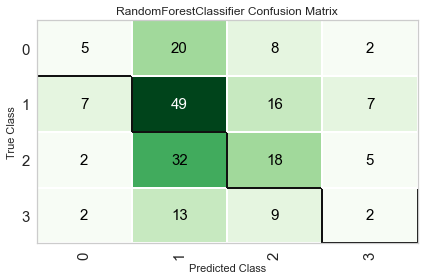

In [30]:
plot_model(rf_use,plot ='confusion_matrix')

In [31]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5870,0.7447,0.5870,0.5484,0.5561,0.3788,0.3886
1,0.5652,0.6813,0.5652,0.4919,0.5146,0.3367,0.3536
2,0.6087,0.7253,0.6087,0.5936,0.5736,0.4047,0.4241
3,0.5217,0.7004,0.5217,0.4511,0.4808,0.2923,0.3011
4,0.3261,0.5740,0.3261,0.2809,0.2996,0.0179,0.0183
5,0.4348,0.6426,0.4348,0.3865,0.3885,0.1433,0.1536
6,0.4783,0.6813,0.4783,0.4748,0.4628,0.2376,0.2424
7,0.5217,0.7436,0.5217,0.5154,0.5160,0.3125,0.3141
8,0.5333,0.7009,0.5333,0.5517,0.5350,0.3182,0.3204


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

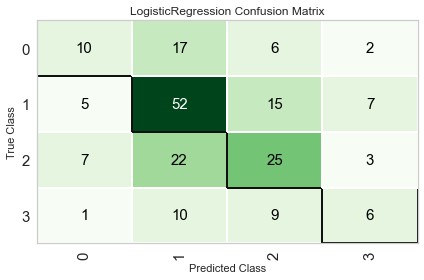

In [33]:
plot_model(lr,plot ='confusion_matrix')

In [36]:
data = pd.read_csv('original_cutOut_bin4.csv')
dt = data.copy()

In [37]:
for i in range(len(a)):
    tree_model.fit(data.iloc[:,i:i+1],data.ycut)
    data[a[i]] = tree_model.predict_proba(data.iloc[:,i:i+1])[:,1]
    data[a[i]] = labelencoder.fit_transform(data[a[i]])

In [40]:
data_onehot =data

In [41]:
data_onehot

,alp,ast,alt,ggt,tp,alb,dbil,tbil,bun,cr,...,eosinophils,basophils,mcv,mch,mchc,rdw,dem_ageyear,dem_sex,pe_bmi,ycut
0,1,3,2,1,2,2,2,1,1,2,...,2,0,3,2,2,1,1,2,1,4
1,3,3,3,1,1,2,2,2,1,2,...,2,0,1,2,3,3,1,2,1,4
2,1,3,3,1,1,2,2,2,1,1,...,2,0,1,2,2,1,2,2,1,4
3,1,1,1,1,1,2,2,2,1,0,...,2,0,2,2,2,2,1,1,0,4
4,3,1,1,1,1,2,2,1,1,0,...,2,0,1,2,1,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,3,3,3,1,1,2,2,2,1,0,...,0,0,2,3,3,2,2,1,0,1
651,2,3,3,1,1,2,2,1,1,2,...,2,1,1,2,2,1,1,2,1,1
652,1,3,3,1,2,2,2,2,1,0,...,2,0,2,1,3,2,2,1,0,1
653,3,2,2,1,1,2,2,2,1,2,...,2,0,2,3,3,0,1,2,1,1


In [42]:
for_rf = setup(data = data_onehot, target = 'ycut')

,Description,Value
0,Session id,7255
1,Target,ycut
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(655, 34)"
5,Transformed data shape,"(655, 34)"
6,Transformed train set shape,"(458, 34)"
7,Transformed test set shape,"(197, 34)"
8,Numeric features,33
9,Preprocess,True


In [43]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5217,0.0000,0.5217,0.4664,0.4739,0.2767,0.2899,0.0170
lr,Logistic Regression,0.5000,0.7098,0.5000,0.4717,0.4697,0.2589,0.2660,0.9580
lda,Linear Discriminant Analysis,0.4827,0.7145,0.4827,0.4465,0.4511,0.2334,0.2403,0.0220
gbc,Gradient Boosting Classifier,0.4737,0.6767,0.4737,0.4641,0.4479,0.2226,0.2305,0.1440
rf,Random Forest Classifier,0.4543,0.6524,0.4543,0.3974,0.4018,0.1613,0.1736,0.0860
et,Extra Trees Classifier,0.4474,0.6462,0.4474,0.4083,0.4100,0.1673,0.1767,0.0740
ada,Ada Boost Classifier,0.4343,0.6261,0.4343,0.4148,0.4123,0.1712,0.1755,0.0480
knn,K Neighbors Classifier,0.4060,0.5947,0.4060,0.3642,0.3720,0.1142,0.1196,0.0490
dummy,Dummy Classifier,0.3996,0.5000,0.3996,0.1597,0.2282,0.0000,0.0000,0.0180
lightgbm,Light Gradient Boosting Machine,0.3950,0.6259,0.3950,0.3803,0.3785,0.1155,0.1170,0.1860


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [44]:
rf_best = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3913,0.5721,0.3913,0.2963,0.3283,0.0395,0.0443
1,0.3478,0.5417,0.3478,0.2336,0.2765,-0.0245,-0.0270
2,0.4348,0.7360,0.4348,0.3870,0.3966,0.1276,0.1339
3,0.5435,0.7217,0.5435,0.4985,0.4938,0.3040,0.3269
4,0.4348,0.6332,0.4348,0.4051,0.3764,0.1206,0.1396
5,0.3913,0.6155,0.3913,0.3362,0.3576,0.0852,0.0885
6,0.4783,0.6978,0.4783,0.4901,0.4345,0.1971,0.2206
7,0.5435,0.7085,0.5435,0.4746,0.4873,0.3240,0.3419
8,0.4222,0.6372,0.4222,0.3818,0.3733,0.1183,0.1258


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

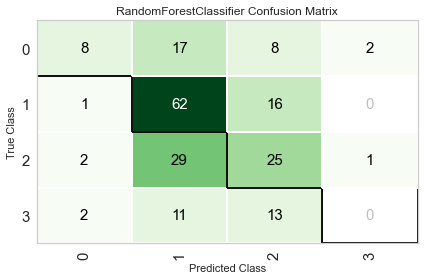

In [46]:
plot_model(rf_best,plot ='confusion_matrix')